In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_house = pd.read_csv('./house_data_set_cleaned_2.csv') 

In [3]:
df_house.head()

,Unnamed: 0,Location,Price,Beds,Baths,House Size,Land Size
0,0,Piliyandala,12500000,4,2,1750.0,6.5
1,1,Kottawa,29500000,4,4,3510.0,9.0
2,2,Malabe,19000000,4,3,2850.0,7.5
3,3,Kottawa,35000000,7,4,1700.0,15.0
4,4,Boralesgamuwa,29500000,5,4,3500.0,8.0


In [6]:
cols = ['Id', 'Location', 'Price', 'Beds', 'Baths',
       'House Size', 'Land Size'
       ]
df_house.columns = cols

In [8]:
df_house.head()

,Id,Location,Price,Beds,Baths,House Size,Land Size
0,0,Piliyandala,12500000,4,2,1750.0,6.5
1,1,Kottawa,29500000,4,4,3510.0,9.0
2,2,Malabe,19000000,4,3,2850.0,7.5
3,3,Kottawa,35000000,7,4,1700.0,15.0
4,4,Boralesgamuwa,29500000,5,4,3500.0,8.0


In [12]:
df_house = df_house.drop(columns= ['Id'], axis=1)

In [13]:
df_house.describe()

,Price,Beds,Baths,House Size,Land Size
count,7.609000e+03,7609.000000,7609.000000,7609.000000,7609.000000
mean,3.109433e+07,3.972795,3.141937,2778.529263,33.444613
std,4.069530e+07,1.186553,1.232166,2668.220947,1835.793791
min,8.500000e+04,1.000000,1.000000,174.240000,1.000000
25%,1.500000e+07,3.000000,2.000000,1750.000000,7.500000
50%,2.200000e+07,4.000000,3.000000,2600.000000,9.600000
75%,3.200000e+07,5.000000,4.000000,3250.000000,11.600000
max,1.300000e+09,10.000000,10.000000,140000.000000,160000.000000


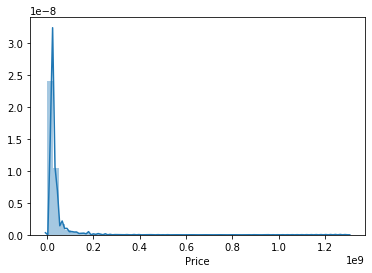

In [14]:
sns.distplot(df_house['Price'])

In [16]:
df_house['Price'].skew()

9.941682732486223

In [17]:
df_house['Price'].kurt()

204.53524681379116

Relationships between features(beds, baths, house size, land size)

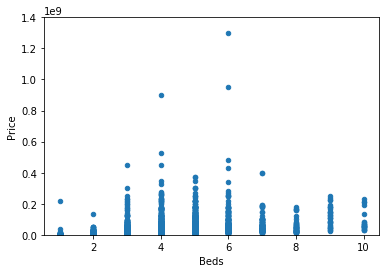

In [18]:
var = 'Beds'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

var = 'Baths'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

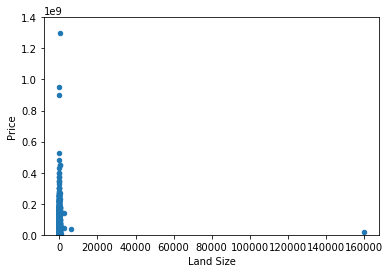

In [20]:
var = 'Land Size'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

In [21]:
df_house[var].describe()

count      7609.000000
mean         33.444613
std        1835.793791
min           1.000000
25%           7.500000
50%           9.600000
75%          11.600000
max      160000.000000
Name: Land Size, dtype: float64

Delete a instance with Land size of 160000 Perches

In [27]:
df_house = df_house.drop(df_house[(df_house['Land Size'] == 160000)].index, axis=0)

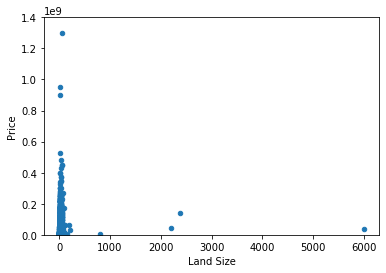

In [28]:
var = 'Land Size'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

Filter above Land size 800 perches

In [31]:
df_house[df_house['Land Size'] > 800]

,Location,Price,Beds,Baths,House Size,Land Size
2056,Dehiwala,38000000,4,4,3500.0,6000.0
3235,Maharagama,42250000,3,3,2200.0,2200.0
7296,Colombo 8,140000000,4,2,2900.0,2387.0


In [33]:
df_house = df_house.drop([2056, 3235], axis=0)

In [34]:
df_house[df_house['Land Size'] > 800]

,Location,Price,Beds,Baths,House Size,Land Size
7296,Colombo 8,140000000,4,2,2900.0,2387.0


In [47]:
df_house['Land Size'] = df_house['Land Size'].apply(lambda x:  
                                                    if float(x) == 2387.0 :
                                                       return float(x/100)
                                                    else:
                                                        return float(x)
                                                   )

SyntaxError: invalid syntax (<ipython-input-47-3bcf7ab01bc7>, line 2)

In [49]:
df_house.set_value(7296, 'Land Size', 23.87)

,Location,Price,Beds,Baths,House Size,Land Size
0,Piliyandala,12500000,4,2,1750.0,6.5
1,Kottawa,29500000,4,4,3510.0,9.0
2,Malabe,19000000,4,3,2850.0,7.5
3,Kottawa,35000000,7,4,1700.0,15.0
4,Boralesgamuwa,29500000,5,4,3500.0,8.0
...,...,...,...,...,...,...
7604,Nawala,27000000,3,1,2500.0,9.0
7605,Kohuwala,115000000,5,5,4000.0,15.5
7606,Piliyandala,13700000,3,3,1456.0,10.0
7607,Battaramulla,35000000,4,4,4200.0,12.0


In [50]:
df_house[df_house['Land Size'] > 800]

,Location,Price,Beds,Baths,House Size,Land Size


In [51]:
df_house.loc[7296]

Location      Colombo 8
Price         140000000
Beds                  4
Baths                 2
House Size         2900
Land Size         23.87
Name: 7296, dtype: object

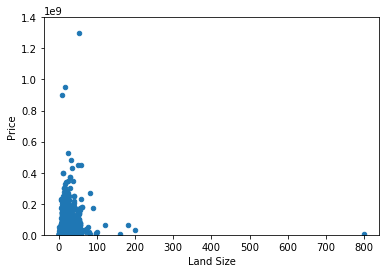

In [52]:
var = 'Land Size'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

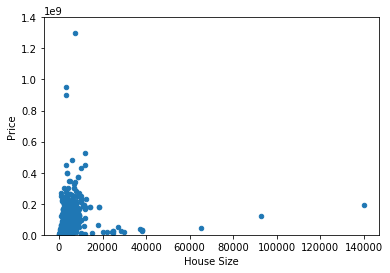

In [53]:
var = 'House Size'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

In [56]:
df_house[df_house['House Size'] > 20000]

,Location,Price,Beds,Baths,House Size,Land Size
31,Nugegoda,37500000,5,3,37000.0,12.00
130,Nugegoda,24800000,3,2,25000.0,10.00
263,Malabe,21000000,4,4,24520.0,7.00
750,Talawatugoda,31000000,5,4,38000.0,7.50
2160,Nugegoda,195000000,9,9,140000.0,31.00
2278,Colombo 6,48000000,2,3,27000.0,4.90
2333,Malabe,10200000,3,2,25000.0,11.00
2628,Kotte,120000000,5,4,93000.0,18.00
2793,Malabe,16000000,4,3,22000.0,6.50
3273,Piliyandala,21000000,4,4,30001.0,8.00


In [57]:
df_house.set_value(31, 'House Size', 3700.0)

,Location,Price,Beds,Baths,House Size,Land Size
0,Piliyandala,12500000,4,2,1750.0,6.5
1,Kottawa,29500000,4,4,3510.0,9.0
2,Malabe,19000000,4,3,2850.0,7.5
3,Kottawa,35000000,7,4,1700.0,15.0
4,Boralesgamuwa,29500000,5,4,3500.0,8.0
...,...,...,...,...,...,...
7604,Nawala,27000000,3,1,2500.0,9.0
7605,Kohuwala,115000000,5,5,4000.0,15.5
7606,Piliyandala,13700000,3,3,1456.0,10.0
7607,Battaramulla,35000000,4,4,4200.0,12.0


In [58]:
df_house[df_house['House Size'] > 20000]

,Location,Price,Beds,Baths,House Size,Land Size
130,Nugegoda,24800000,3,2,25000.0,10.00
263,Malabe,21000000,4,4,24520.0,7.00
750,Talawatugoda,31000000,5,4,38000.0,7.50
2160,Nugegoda,195000000,9,9,140000.0,31.00
2278,Colombo 6,48000000,2,3,27000.0,4.90
2333,Malabe,10200000,3,2,25000.0,11.00
2628,Kotte,120000000,5,4,93000.0,18.00
2793,Malabe,16000000,4,3,22000.0,6.50
3273,Piliyandala,21000000,4,4,30001.0,8.00
4177,Talawatugoda,45000000,5,4,65000.0,15.00


In [59]:
df_house.set_value(130, 'House Size', 2500.0)

,Location,Price,Beds,Baths,House Size,Land Size
0,Piliyandala,12500000,4,2,1750.0,6.5
1,Kottawa,29500000,4,4,3510.0,9.0
2,Malabe,19000000,4,3,2850.0,7.5
3,Kottawa,35000000,7,4,1700.0,15.0
4,Boralesgamuwa,29500000,5,4,3500.0,8.0
...,...,...,...,...,...,...
7604,Nawala,27000000,3,1,2500.0,9.0
7605,Kohuwala,115000000,5,5,4000.0,15.5
7606,Piliyandala,13700000,3,3,1456.0,10.0
7607,Battaramulla,35000000,4,4,4200.0,12.0


In [60]:
df_house[df_house['House Size'] > 20000]

,Location,Price,Beds,Baths,House Size,Land Size
263,Malabe,21000000,4,4,24520.0,7.00
750,Talawatugoda,31000000,5,4,38000.0,7.50
2160,Nugegoda,195000000,9,9,140000.0,31.00
2278,Colombo 6,48000000,2,3,27000.0,4.90
2333,Malabe,10200000,3,2,25000.0,11.00
2628,Kotte,120000000,5,4,93000.0,18.00
2793,Malabe,16000000,4,3,22000.0,6.50
3273,Piliyandala,21000000,4,4,30001.0,8.00
4177,Talawatugoda,45000000,5,4,65000.0,15.00
5422,Piliyandala,22000000,4,4,28503.0,8.00


In [63]:
df_house = df_house.drop(df_house[df_house['House Size'] == 140000.0].index, axis=0)

In [64]:
df_house[df_house['House Size'] > 20000]

,Location,Price,Beds,Baths,House Size,Land Size
263,Malabe,21000000,4,4,24520.0,7.00
750,Talawatugoda,31000000,5,4,38000.0,7.50
2278,Colombo 6,48000000,2,3,27000.0,4.90
2333,Malabe,10200000,3,2,25000.0,11.00
2628,Kotte,120000000,5,4,93000.0,18.00
2793,Malabe,16000000,4,3,22000.0,6.50
3273,Piliyandala,21000000,4,4,30001.0,8.00
4177,Talawatugoda,45000000,5,4,65000.0,15.00
5422,Piliyandala,22000000,4,4,28503.0,8.00
5446,Moratuwa,22000000,5,3,38000.0,13.75


In [65]:
df_house.set_value(2793, 'House Size', 2200.0)

,Location,Price,Beds,Baths,House Size,Land Size
0,Piliyandala,12500000,4,2,1750.0,6.5
1,Kottawa,29500000,4,4,3510.0,9.0
2,Malabe,19000000,4,3,2850.0,7.5
3,Kottawa,35000000,7,4,1700.0,15.0
4,Boralesgamuwa,29500000,5,4,3500.0,8.0
...,...,...,...,...,...,...
7604,Nawala,27000000,3,1,2500.0,9.0
7605,Kohuwala,115000000,5,5,4000.0,15.5
7606,Piliyandala,13700000,3,3,1456.0,10.0
7607,Battaramulla,35000000,4,4,4200.0,12.0


In [70]:
df_house = df_house.drop(df_house[df_house['House Size'] == 38000.0 ].index, axis=0)

In [71]:
df_house[df_house['House Size'] > 20000]

,Location,Price,Beds,Baths,House Size,Land Size
2278,Colombo 6,48000000,2,3,27000.0,4.9
2333,Malabe,10200000,3,2,25000.0,11.0
2628,Kotte,120000000,5,4,93000.0,18.0
3273,Piliyandala,21000000,4,4,30001.0,8.0
4177,Talawatugoda,45000000,5,4,65000.0,15.0
5422,Piliyandala,22000000,4,4,28503.0,8.0
6075,Piliyandala,21500000,5,3,25000.0,8.2


In [72]:
df_house = df_house.drop(df_house[df_house['House Size'] == 65000.0 ].index, axis=0)

In [73]:
df_house[df_house['House Size'] > 20000]

,Location,Price,Beds,Baths,House Size,Land Size
2278,Colombo 6,48000000,2,3,27000.0,4.9
2333,Malabe,10200000,3,2,25000.0,11.0
2628,Kotte,120000000,5,4,93000.0,18.0
3273,Piliyandala,21000000,4,4,30001.0,8.0
5422,Piliyandala,22000000,4,4,28503.0,8.0
6075,Piliyandala,21500000,5,3,25000.0,8.2


In [74]:
df_house = df_house.drop(df_house[df_house['House Size'] > 20000].index, axis=0)

In [75]:
df_house[df_house['House Size'] > 20000]

,Location,Price,Beds,Baths,House Size,Land Size


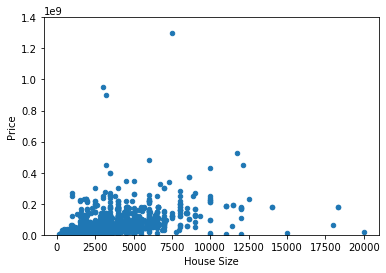

In [78]:
var = 'House Size'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

In [79]:
df_house[df_house['Price'] > 0.800000e+09]

,Location,Price,Beds,Baths,House Size,Land Size
720,Athurugiriya,950000000,6,3,3000.0,15.0
2541,Kolonnawa,1300000000,6,6,7500.0,53.0
2991,Colombo 8,900000000,4,3,3200.0,9.0


Removing 720	Athurugiriya	950000000	6	3	3000.0	15.0
It's not a house

In [80]:
df_house = df_house.drop(df_house[df_house['Price'] == 950000000].index, axis=0)

In [81]:
df_house[df_house['Price'] > 0.800000e+09]

,Location,Price,Beds,Baths,House Size,Land Size
2541,Kolonnawa,1300000000,6,6,7500.0,53.0
2991,Colombo 8,900000000,4,3,3200.0,9.0


Correlation Matrix

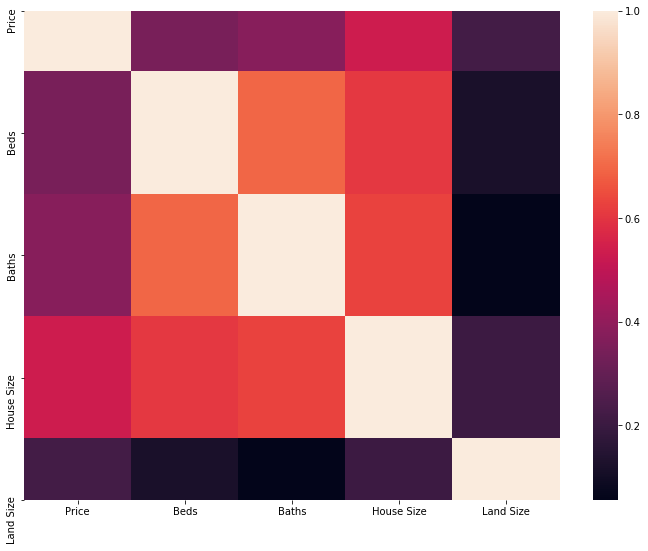

In [84]:
corr_mat = df_house.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat)

Distribution of instances by location

In [97]:
df_house.groupby('Location').count()

,Price,Beds,Baths,House Size,Land Size
Location,,,,,
Angoda,71,71,71,71,71
Athurugiriya,471,471,471,471,471
Avissawella,26,26,26,26,26
Battaramulla,357,357,357,357,357
Boralesgamuwa,279,279,279,279,279
Colombo 10,20,20,20,20,20
Colombo 12,7,7,7,7,7
Colombo 13,8,8,8,8,8
Colombo 14,11,11,11,11,11


In [98]:
from tensorflow.keras.utils import to_categorical

In [103]:
df_house['Location'] = pd.Categorical(df_house['Location']).codes

In [104]:
df_house.head()

,Location,Price,Beds,Baths,House Size,Land Size
0,35,12500000,4,2,1750.0,6.5
1,25,29500000,4,4,3510.0,9.0
2,28,19000000,4,3,2850.0,7.5
3,25,35000000,7,4,1700.0,15.0
4,4,29500000,5,4,3500.0,8.0


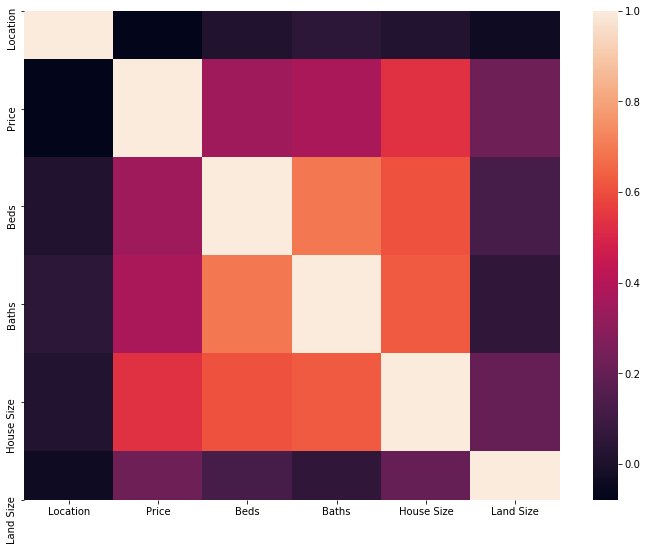

In [105]:
corr_mat = df_house.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat)

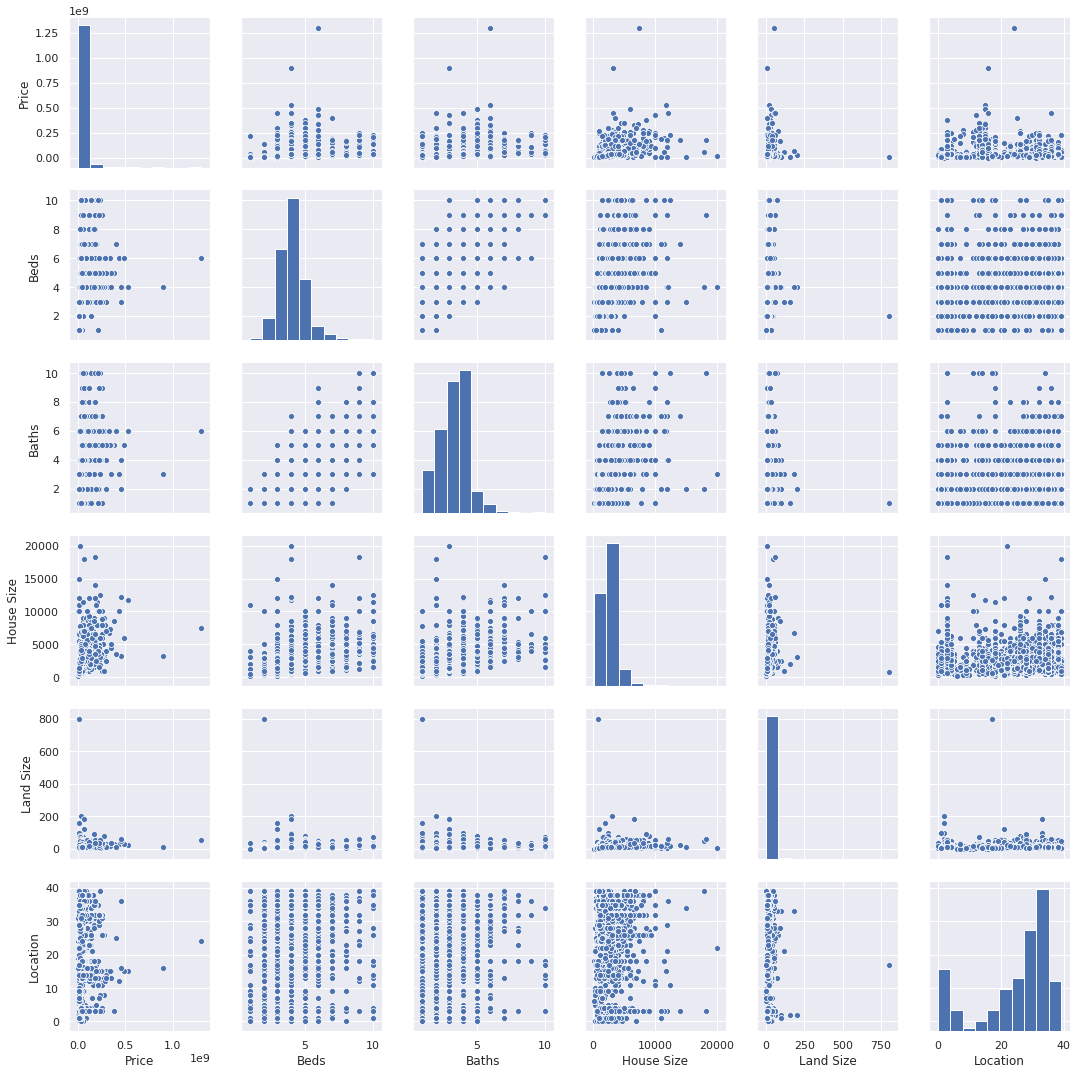

In [106]:
#scatterplot
sns.set()
cols = ['Price', 'Beds', 'Baths', 'House Size', 'Land Size', 'Location']
sns.pairplot(df_house[cols], size = 2.5)
plt.show();

Drop price above 0.8e9

In [107]:
df_house = df_house.drop(df_house[df_house['Price'] > 0.800000e+09].index, axis=0)

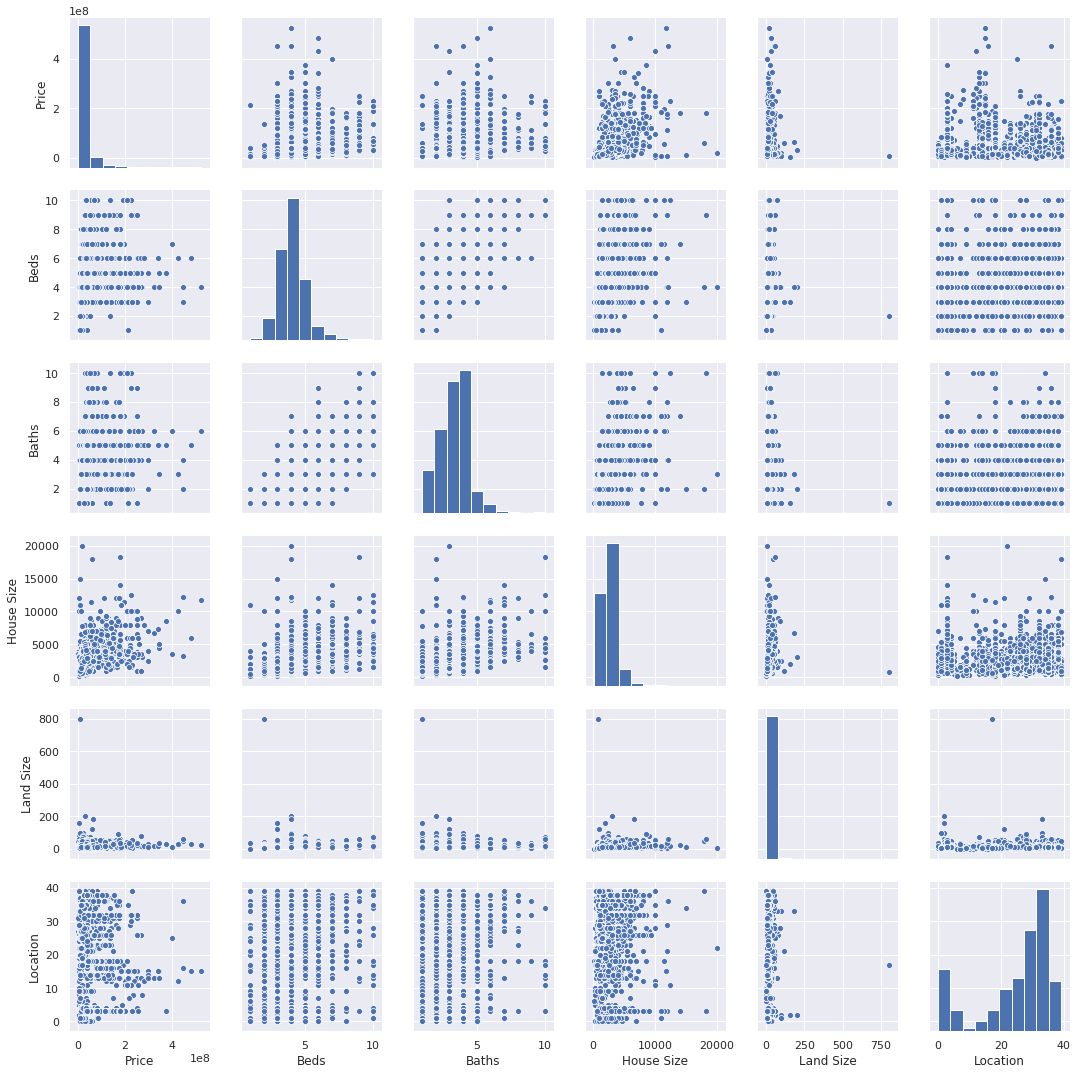

In [108]:
#scatterplot
sns.set()
cols = ['Price', 'Beds', 'Baths', 'House Size', 'Land Size', 'Location']
sns.pairplot(df_house[cols], size = 2.5)
plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


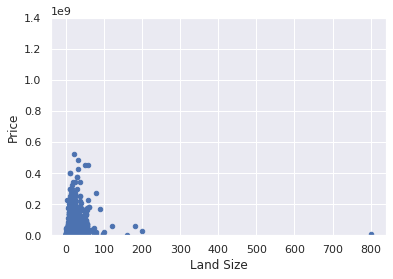

In [109]:
var = 'Land Size'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

Land size above 300 perches because we don't have enough points

In [111]:
df_house = df_house.drop(df_house[df_house['Land Size'] > 300].index, axis = 0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


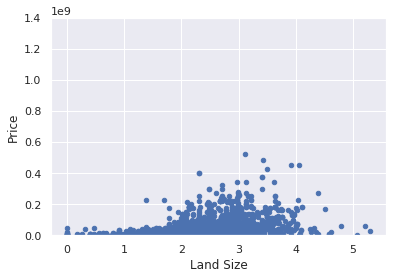

In [113]:
var = 'Land Size'
data = pd.concat([df_house['Price'], np.log(df_house[var])], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


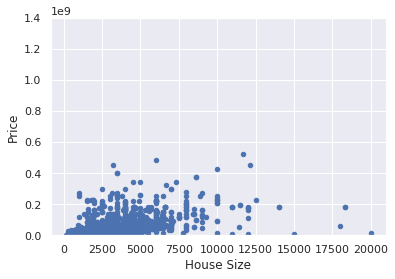

In [115]:
var = 'House Size'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

deleting instances have house size above or equal 15000 sqft because we don't have enough points

In [116]:
df_house = df_house.drop(df_house[df_house['House Size'] >= 15000].index, axis = 0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


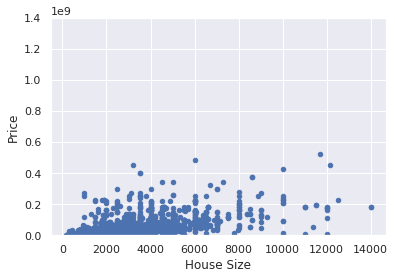

In [117]:
var = 'House Size'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


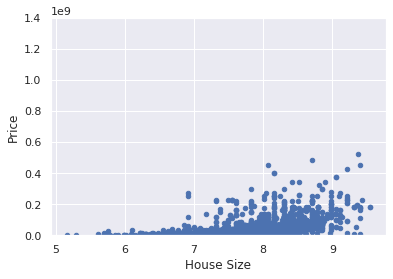

In [118]:
var = 'House Size'
data = pd.concat([df_house['Price'], np.log(df_house[var])], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,1.400000e+09))

In [119]:
df_house.isnull().sum()

Location      0
Price         0
Beds          0
Baths         0
House Size    0
Land Size     0
dtype: int64

Univariate analysis

In [120]:
from sklearn.preprocessing import StandardScaler

In [122]:
price_scaled = StandardScaler().fit_transform(
    df_house['Price'][:, np.newaxis]
)

In [123]:
low_range = price_scaled[price_scaled[:,0].argsort()][: 10]

In [124]:
low_range

array([[-0.87198699],
       [-0.83729868],
       [-0.83158866],
       [-0.83158866],
       [-0.83016116],
       [-0.82873366],
       [-0.82302365],
       [-0.81731364],
       [-0.81731364],
       [-0.81731364]])

In [125]:
high_range = price_scaled[price_scaled[:, 0].argsort()][-10:]

In [126]:
high_range

array([[ 8.97535531],
       [ 9.83185697],
       [ 9.83185697],
       [10.54560835],
       [10.54560835],
       [11.37355996],
       [11.97311112],
       [11.97311112],
       [12.88671288],
       [14.11436526]])

high range 14.--- , it's out of range, but low range close to 0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


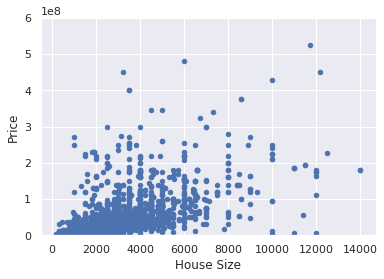

In [128]:
var = 'House Size'
data = pd.concat([df_house['Price'],df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,0.600000e+09))

In [129]:
df_house['House Size'].describe()

count     7585.000000
mean      2687.324345
std       1302.480021
min        174.240000
25%       1750.000000
50%       2600.000000
75%       3245.000000
max      14000.000000
Name: House Size, dtype: float64

In [131]:
df_house['Price'].describe()

count    7.585000e+03
mean     3.062739e+07
std      3.502851e+07
min      8.500000e+04
25%      1.500000e+07
50%      2.200000e+07
75%      3.200000e+07
max      5.250000e+08
Name: Price, dtype: float64

In [134]:
df_house[df_house['Price'] <= 100000]

,Location,Price,Beds,Baths,House Size,Land Size
6323,31,85000,3,2,1200.0,10.0


In [135]:
df_house = df_house.drop(df_house[df_house['Price'] <= 100000].index, 
                        axis=0)

In [140]:
df_house[df_house['Price'] <= 1000000]

,Location,Price,Beds,Baths,House Size,Land Size


In [141]:
df_house['Price'].describe()

count    7.584000e+03
mean     3.063142e+07
std      3.502906e+07
min      1.300000e+06
25%      1.500000e+07
50%      2.200000e+07
75%      3.200000e+07
max      5.250000e+08
Name: Price, dtype: float64

In [146]:
df_house[df_house['Price'] <= 3000000]

,Location,Price,Beds,Baths,House Size,Land Size
108,0,2600000,3,3,1800.00,12.50
372,20,2800000,2,1,1200.00,5.80
748,24,2500000,2,1,1400.00,4.00
805,25,2500000,2,1,1500.00,12.00
973,19,2500000,2,1,900.00,10.00
1139,20,1550000,2,1,1200.00,10.00
1179,35,2000000,1,1,1200.00,4.00
1211,37,2400000,2,1,552.00,3.50
1267,21,2200000,2,1,1200.00,9.00
1347,39,2700000,2,1,600.00,2.00


drop 1502 because it's only for land value 

In [145]:
df_house = df_house.drop(1502, axis=0)

drop 1139, 4294, 4825, 

In [147]:
df_house = df_house.drop([1139, 4294, 4825], axis=0)

In [148]:
df_house['Price'].describe()

count    7.580000e+03
mean     3.064671e+07
std      3.503198e+07
min      1.300000e+06
25%      1.500000e+07
50%      2.200000e+07
75%      3.200000e+07
max      5.250000e+08
Name: Price, dtype: float64

Analyse house price above 5 crore

In [150]:
df_house[df_house['Price'] >= 4e+08]

,Location,Price,Beds,Baths,House Size,Land Size
382,15,525000000,4,6,11715.0,22.3
414,25,400000000,7,6,3500.0,10.0
1741,12,429000000,6,3,10000.0,33.0
3108,15,482000000,6,5,6000.0,31.0
3688,16,450000000,3,2,3200.0,50.0
5810,25,400000000,7,6,3500.0,10.0
7516,36,450000000,4,4,12150.0,57.7


In [151]:
df_house['Beds'].describe()

count    7580.000000
mean        3.971108
std         1.182662
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        10.000000
Name: Beds, dtype: float64

In [152]:
df_house['Baths'].describe()

count    7580.000000
mean        3.140237
std         1.225468
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Baths, dtype: float64

In [153]:
df_house[df_house['Baths'] > 7]

,Location,Price,Beds,Baths,House Size,Land Size
109,34,28500000,10,10,2750.0,7.00
176,18,80000000,10,10,6000.0,33.50
701,13,40000000,10,10,1500.0,70.00
870,36,175000000,6,8,12000.0,34.50
1201,18,41000000,9,9,5100.0,10.00
1320,18,68000000,10,10,3800.0,15.00
1332,3,49000000,10,10,5000.0,13.00
1524,38,43000000,10,8,3500.0,32.00
1931,3,164000000,8,8,9000.0,16.00
2114,18,35000000,8,8,3900.0,5.34


In [155]:
df_house[df_house['Price'] >= 3e+08]

,Location,Price,Beds,Baths,House Size,Land Size
29,3,375000000,5,5,8600.0,30.0
382,15,525000000,4,6,11715.0,22.3
414,25,400000000,7,6,3500.0,10.0
974,13,300000000,5,5,7000.0,12.0
1741,12,429000000,6,3,10000.0,33.0
2133,13,325000000,4,6,6700.0,15.0
2957,3,375000000,5,5,8600.0,30.0
3043,15,300000000,5,4,4000.0,15.0
3108,15,482000000,6,5,6000.0,31.0
3588,14,300000000,3,2,2500.0,30.0


414 => 2 units => drop
5810 => 2 units => drop
3043 => only land value => drop




In [156]:
df_house = df_house.drop([414, 5810, 3043], axis=0)

In [157]:
df_house['Price'].describe()

count    7.577000e+03
mean     3.051366e+07
std      3.438193e+07
min      1.300000e+06
25%      1.500000e+07
50%      2.200000e+07
75%      3.200000e+07
max      5.250000e+08
Name: Price, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


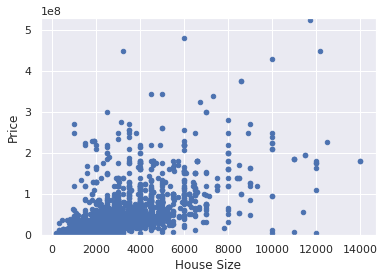

In [160]:
var = 'House Size'
data = pd.concat([df_house['Price'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(-1000000,5.300000e+08))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


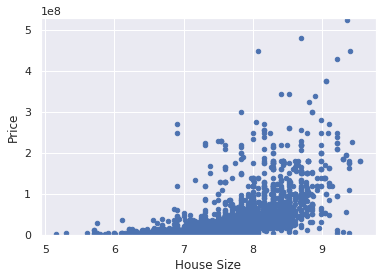

In [161]:
var = 'House Size'
data = pd.concat([df_house['Price'], np.log(df_house[var])], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(-1000000,5.300000e+08))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


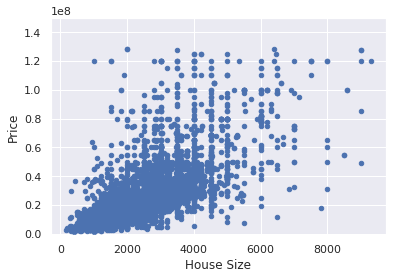

In [166]:
var = 'House Size'
data = pd.concat([df_house[df_house['Price'] < 1.3e+8]['Price'], df_house[df_house[var] < 10000][var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(-1000000,1.500000e+08))

Distribution plots and try to fit normal distribution

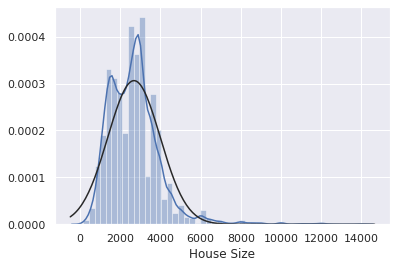

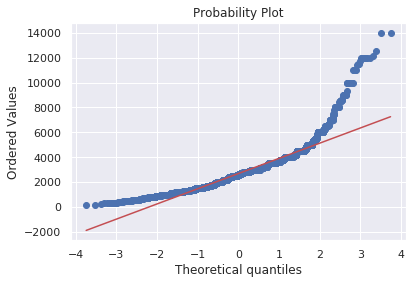

In [168]:
sns.distplot(df_house['House Size'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_house['House Size'], plot =plt)

Try log tranformation

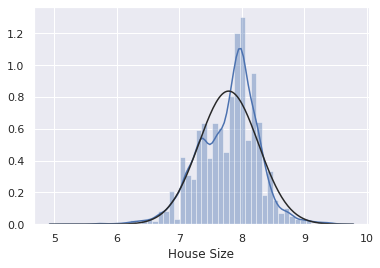

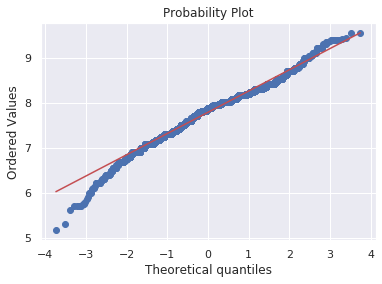

In [169]:
sns.distplot(np.log(df_house['House Size']), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(df_house['House Size']), plot =plt)

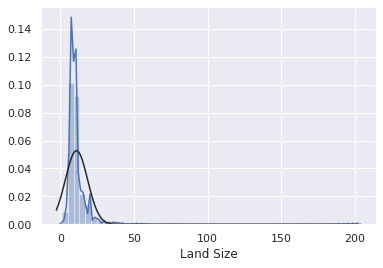

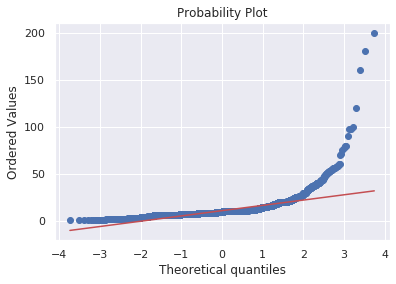

In [172]:
sns.distplot(df_house['Land Size'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_house['Land Size'], plot =plt)

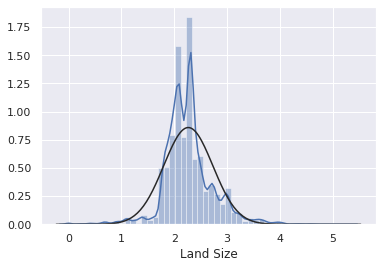

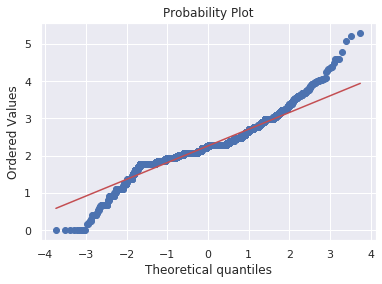

In [171]:
sns.distplot(np.log(df_house['Land Size']), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(df_house['Land Size']), plot =plt)

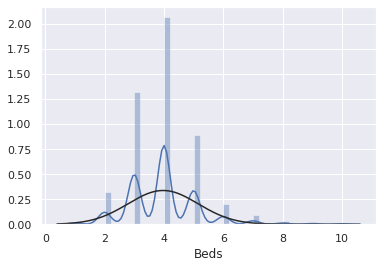

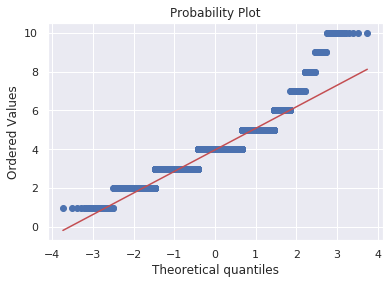

In [174]:
sns.distplot(df_house['Beds'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_house['Beds'], plot =plt)

In [175]:
df_house.to_csv(r'./house-data-set-cleaned-3.csv')